<a href="https://colab.research.google.com/github/spttleonardo/RL_Students_and_Microchips/blob/main/RegressaoLogistic_Students_and_Microchips_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este Coolab refere-se à aplicação do algoritmo de regressão logistica ao problema de previsão da admissão de estudantes através dos resultados de dois exames. O segundo objetivo consiste na aplicação do mesmo algoritmo para prever se os microchips fabricados passam no teste de qualidade

Entre os métodos desenvolvidos, destacam-se a utilização da descida do gradiente.

**REGRESSÃO LOGISTICA PARA O PRIMEIRO CASO**

Aplicanado regressão logisitca para prever admissão de estudantes através dos resultados de dois exames

---



In [25]:
# Importando módulos
import os
import numpy as np
from matplotlib import pyplot as plt
from scipy import optimize

In [26]:
# Carregando data
data = np.loadtxt('/content/ex2data1.txt', delimiter= ',')
X, y  = data[:,:2], data[:,2]

In [27]:
# Função para plotar os dados
def plotData(X,y):

    fig = plt.figure()

    pos = y == 1
    neg = y == 0

    plt.plot(X[pos, 0], X[pos, 1], 'k*', lw = 2, ms = 10)
    plt.plot(X[neg,0], X[neg,1], 'ko', mfc = 'y', ms=8, mec = 'k', mew=1)


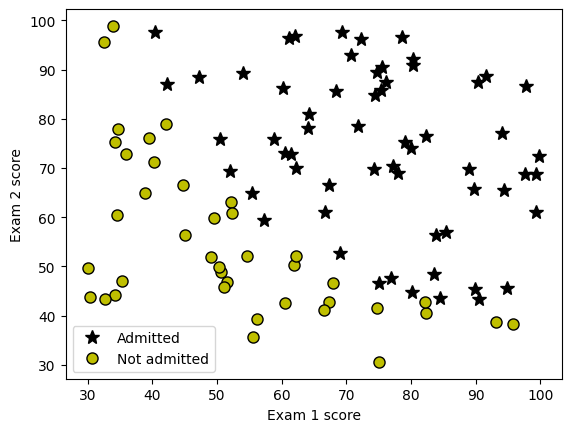

In [28]:
# Plotando dados
plotData(X,y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
pass

In [29]:
# Funcao para obter a variavel z que é usada para calcular a hipotse da sigmoide
def findZ(X,y, theta):

    m = y.size

    a = np.ones((m,1))

    Xin = X.copy()
    Xin = np.hstack((a, Xin))

    thetain = theta.reshape(-1,1)

    z = Xin @ thetain

    return z

In [30]:
# Função para cálculo da sigmoide
def sigmoid(z):

    z = np.array(z)
    g = np.zeros(z.shape)

    g = 1/(1+np.exp(-z))

    return g

In [31]:
# Testando a função para encontrar a hipótese
z = 0
g = sigmoid(z)

print('g(',z,')=',g)

g( 0 )= 0.5


In [32]:
# Obtendo numero de linhas e coluna de X
m, n =  X.shape

# Expandindo a dimensão de Y para 2D
Ytrain = np.expand_dims(y, axis=1)

In [33]:
# Função de custo
def costFunction(theta, X, y):
    m = y.shape[0]

    # Adiciona a coluna de 1s para o bias
    X_aug = np.hstack((np.ones((m,1)), X))

    theta = theta.reshape(-1, 1)
    y = y.reshape(-1, 1)

    z = X_aug @ theta
    h = sigmoid(z)

    # Custo
    J = -(1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    J = J.item()  # transforma J em escalar

    # Gradiente
    grad = (1/m) * (X_aug.T @ (h - y))
    grad = grad.flatten()

    return J, grad


In [34]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, Ytrain)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


In [35]:
# Utilizando função optimize para obter a Loss Function e o theta
options = {'maxiter': 400}


res = optimize.minimize(costFunction,
                        initial_theta,
                        (X,Ytrain),
                        jac = True,
                        method = 'TNC',
                        options = options)

cost = res.fun
theta = res.x

print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


<ipython-input-35-32ff3ca4f412>:5: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunction,


In [36]:
def mapFeature(X1, X2, degree=6):
    """
    Maps the two input features to quadratic features used in the regularization exercise.

    Returns a new feature array with more features, comprising of
    X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..

    Parameters
    ----------
    X1 : array_like
        A vector of shape (m, 1), containing one feature for all examples.

    X2 : array_like
        A vector of shape (m, 1), containing a second feature for all examples.
        Inputs X1, X2 must be the same size.

    degree: int, optional
        The polynomial degree.

    Returns
    -------
    : array_like
        A matrix of of m rows, and columns depend on the degree of polynomial.
    """
    if X1.ndim > 0:
        out = [np.ones(X1.shape[0])]
    else:
        out = [np.ones(1)]

    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))

    if X1.ndim > 0:
        return np.stack(out, axis=1)
    else:
        out_vec = np.array([float(x) for x in out])
        return out_vec


def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.

    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.

    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, :2], y)

    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])

        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)

        # Legend, specific for the exercise
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.xlim([30, 100])
        plt.ylim([30, 100])
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)

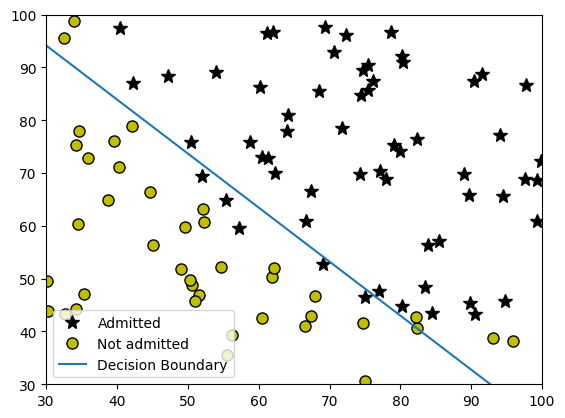

In [37]:
# Plotando o limiar de decisão entre os dados
plotDecisionBoundary(plotData, theta, X, y)

In [38]:
# Função para predizer se a label é 0 ou 1
def predict(theta, X):

    m = X.shape[0]

    p = np.zeros(m)

    Xin = X.copy()
    Xin = np.hstack([np.ones((m,1)),Xin])

    z = Xin @ theta
    h = sigmoid(z)

    # converter para 0 ou 1
    p = (h >= 0.5).astype(int)

    return p

In [39]:
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')


# Computando a accurácia do dados de treino
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


**REGRESSÃO LOGISTICA PARA O SEGUNDO PROBLEMA**

Aplicanado regressão logisitca para prever se o microchip passará pelo teste de qualidade

---

In [40]:
# Carrengando dados
data2 = np.loadtxt('/content/ex2data2.txt', delimiter=',')
X = data2[:,:2]
y = data2[:, 2]

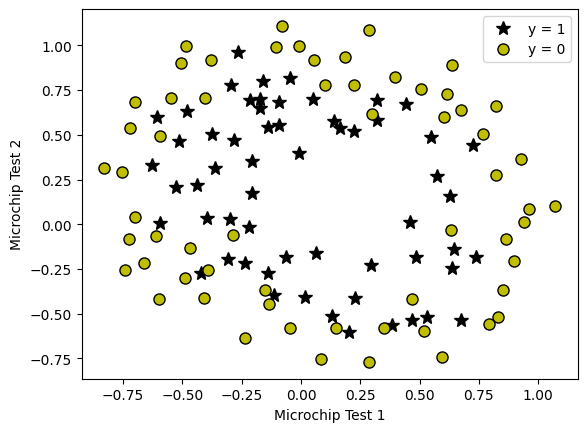

In [41]:
# Plotando dados
plotData(X,y)
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0'], loc='upper right')
pass

In [42]:
# Utilizando a função mapFeature para retornar comibação polinomias entre vetores
X1 = mapFeature(X[:, 0], X[:, 1])

In [43]:
# Função custo para
def costFunctionReg(theta, X, y, lambda_):

    m = y.size

    # reshape e monta X com intercepto
    y     = y.reshape(-1,1)
    theta = theta.reshape(-1,1)

    #hipótese
    z = X @ theta
    h = sigmoid(z)

    # custo não regularizado
    J_unreg = -(1/m) * ( y.T @ np.log(h)
                       + (1 - y).T @ np.log(1 - h) )
    J_unreg = J_unreg.item()       # escalar

    #termo de regularização (θ₀ não inclui)
    J_reg = (lambda_ / (2*m)) * np.sum(theta[1:]**2)

    #custo total
    J = J_unreg + J_reg

    #gradiente não regularizado
    grad_unreg = (1/m) * (X.T @ (h - y))

    #adiciona regularização no gradiente (j ≥ 1)
    grad = grad_unreg.copy()
    grad[1:] += (lambda_ / m) * theta[1:]

    # flatten para 1-D e retorna
    return J, grad.flatten()

In [44]:
initial_theta = np.zeros(X1.shape[1])

# Não usar 'lambda' porque é uma keyword em python
lambda_ = 1

# Obtendo o custo e o gradiente com lambda = 1
cost, grad = costFunctionReg(initial_theta, X1, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Obtendo o custo e o gradiente com lambda = 10
test_theta = np.ones(X1.shape[1])
cost, grad = costFunctionReg(test_theta, X1, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


In [45]:
def predict2(theta, X):

    # Numero de exemplos para treino
    m = X.shape[0]

    p = np.zeros(m)

    Xin = X.copy()

    z = Xin @ theta
    h = sigmoid(z)

    # Converter para 0 ou 1
    p = (h >= 0.5).astype(int)


    return p

In [46]:
initial_theta = np.zeros(X1.shape[1])

# Utilizando lambda igual a 1
lambda_ = 1

options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X1, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

cost = res.fun
theta = res.x

print(theta)

[ 1.27271026  0.62529965  1.18111686 -2.01987399 -0.91743189 -1.43166927
  0.12393228 -0.36553118 -0.35725403 -0.17516291 -1.45817009 -0.05098417
 -0.61558553 -0.27469165 -1.19271299 -0.24217841 -0.20603298 -0.04466179
 -0.27778951 -0.29539514 -0.45645981 -1.04319154  0.02779373 -0.29244871
  0.01555761 -0.32742405 -0.1438915  -0.92467487]


<ipython-input-46-3b915af9d904>:8: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunctionReg,


<ipython-input-47-6a7f10ce0635>:10: OptimizeWarning: Unknown solver options: maxiter
  res = optimize.minimize(costFunctionReg,
<ipython-input-36-5ee0b28a0482>:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  out_vec = np.array([float(x) for x in out])


Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



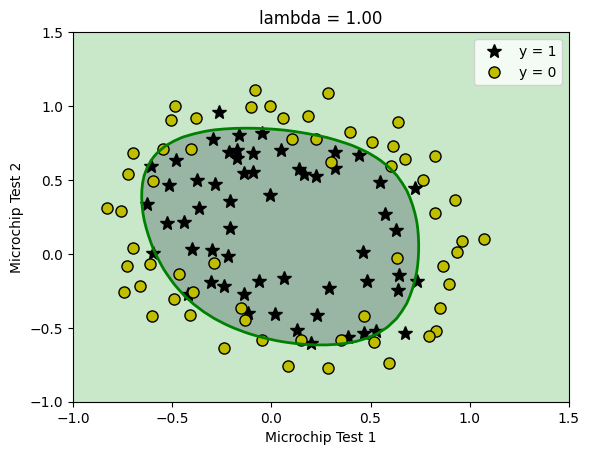

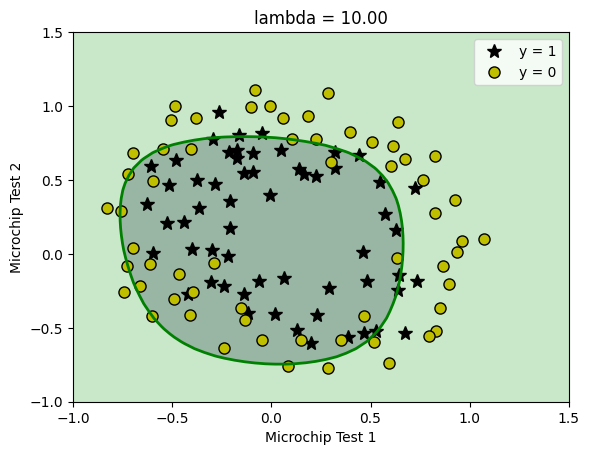

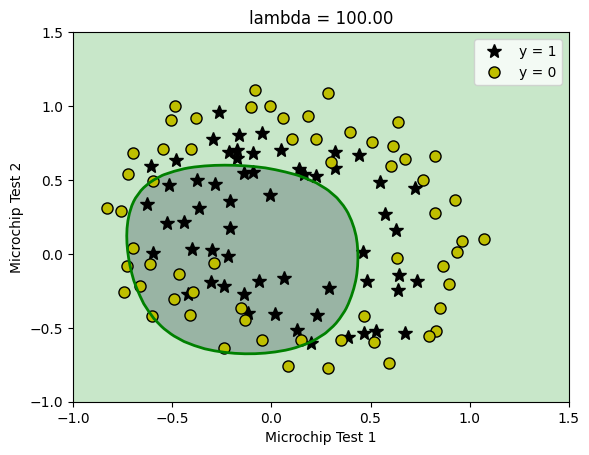

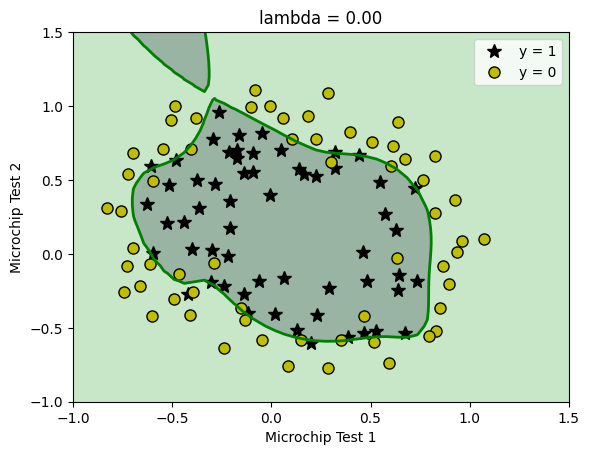

In [47]:
# Range do grid
lambda_ = [1, 10, 100, 0]
u = np.linspace(-1, 1.5, 50)
v = np.linspace(-1, 1.5, 50)


# Evolução do z = theta*x
for l, li in enumerate(lambda_):

    res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X1, y,  li),
                        jac=True,
                        method='TNC',
                        options=options)

    z = np.zeros((u.size, v.size))

    cost = res.fun
    theta = res.x

    if(li == 1):best_theta = theta

    for i, ui in enumerate(u):
        for j, vj in enumerate(v):
            z[i, j] = np.dot(mapFeature(ui, vj), theta)

    z = z.T  # important to transpose z before calling contour

    plotData(X, y)
    plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
    plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'])
    plt.grid(False)
    plt.title('lambda = %0.2f' % li)

# Computando a accurácia
p = predict2(best_theta, X1)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')
